<a href="https://colab.research.google.com/github/naphatsiri/DADS7203-Word-Embedding/blob/main/6620412003_NIDA_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Import working libraries

In [2]:
!pip install gensim

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [129]:
import pandas as pd
import numpy  as np
from sklearn.decomposition import PCA
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [141]:
#Preparing data

path = 'https://raw.githubusercontent.com/naphatsiri/DADS7203-Word-Embedding/refs/heads/main/TaylorSwift.csv'

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  337 non-null    int64 
 1   Artist      337 non-null    object
 2   Title       337 non-null    object
 3   Album       280 non-null    object
 4   Year        337 non-null    int64 
 5   Date        337 non-null    object
 6   Lyric       335 non-null    object
dtypes: int64(2), object(5)
memory usage: 18.6+ KB


# Step 2 : Cleansing data

In [142]:
#Cleaned all rows that column 'Lyric' is N/A
#All rows that column 'Year' is greater than 2015 and less than or equal to 2015


df_cleaned1 = df.dropna(subset = ['Lyric'])

df_cleaned2 = df[df['Year'] <= 2015].reset_index(drop = True)
df_cleaned3 = df[df['Year'] > 2015].reset_index(drop = True)

df_cleaned4 = df_cleaned2['Lyric']
df_cleaned5 = df_cleaned3['Lyric']

In [143]:
#Clean data by removing stopwords

group1 = pd.DataFrame({'Lyric': df_cleaned4})
group2 = pd.DataFrame({'Lyric': df_cleaned5})

stop_words = set(stopwords.words("english"))

sent1 = []
for row in group1['Lyric']:
    words = str(row).split(' ')  # Convert row to string before splitting
    filtered_words = [word for word in words if word not in stop_words]
    sent1.append(filtered_words)

sent2 = []
for row in group2['Lyric']:
    words = str(row).split(' ')  # Convert row to string before splitting
    filtered_words = [word for word in words if word not in stop_words]
    sent2.append(filtered_words)

#Example of group 1 's cleaned stopwords

print(group1)
sent1[:3]


                                                 Lyric
0    there's a monster in my closet and i don't kno...
1    keep your helmet keep your life son just a fle...
2    he said i got me a nice new apartment in the c...
3    i wake up i stretch out i wonder what you're d...
4    drew looks at me i fake a smile so he won't se...
..                                                 ...
179  i want to thank the fans for the last 0 years ...
180  enchanted this night is sparkling don't you le...
181  5 may 05 las vegas  ed sheeran  tenerife sea  ...
182  he said let's get out of this town drive out o...
183  i write this to explain why ill be holding bac...

[184 rows x 1 columns]


[["there's",
  'monster',
  'closet',
  'know',
  'ever',
  'seen',
  'ever',
  'pounced',
  'wonder',
  'looks',
  'like',
  'purple',
  'red',
  'eyes',
  'wonder',
  'likes',
  'eat',
  'size',
  'tonight',
  'gonna',
  'catch',
  'set',
  'real',
  'big',
  'trap',
  'train',
  'really',
  'well',
  'answer',
  'clap',
  '',
  'looked',
  'closet',
  'nothing',
  'stuff',
  'know',
  "monster's",
  'heard',
  'huff',
  'puff',
  'could',
  'wants',
  'eat',
  'maybe',
  'favorite',
  'tray',
  'comes',
  'get',
  'scream',
  'loudly',
  'go',
  'away',
  'nice',
  'name',
  'happy',
  'bad',
  'name',
  'grouch',
  'suspect',
  'leaving',
  '',
  'kick'],
 ['keep',
  'helmet',
  'keep',
  'life',
  'son',
  'flesh',
  'wound',
  "here's",
  'rifle',
  'crawling',
  'beaches',
  'sir',
  'think',
  'bleeding',
  'things',
  "can't",
  'speak',
  '',
  '',
  'serve',
  'fall',
  'watch',
  'breathe',
  'watch',
  'breathing',
  '',
  '',
  'something',
  'med',
  'school',
  'cover',

# Step 3 : Apply skip-gram from Word2Vec Model into group 1 and group 2

In [144]:
#Apply 'most_similar' function into Group1 and Group2

model1 = Word2Vec(sent1, min_count = 1,workers = 3, window =3, sg = 1)
model2 = Word2Vec(sent2, min_count = 1,workers = 3, window =3, sg = 1)

print(f'Group 1 Word2Vec model informantion \n{model1}')
print()
print(f'Group 2 Word2Vec model informantion \n{model2}')

Group 1 Word2Vec model informantion 
Word2Vec<vocab=3448, vector_size=100, alpha=0.025>

Group 2 Word2Vec model informantion 
Word2Vec<vocab=4763, vector_size=100, alpha=0.025>


### 3.1 Group 1

In [145]:
#Group 1
#Top 5 most similarity of 'love', 'break', 'perfect', 'night' and 'heart'

simi_love = model1.wv.most_similar('love')[:5]
simi_break = model1.wv.most_similar('break')[:5]
simi_perfect = model1.wv.most_similar('perfect')[:5]
simi_night = model1.wv.most_similar('night')[:5]
simi_heart = model1.wv.most_similar('heart')[:5]

print("Top 5 most similarity of 'love'")
print(simi_love)
print("Top 5 most similarity of 'break'")
print(simi_break)
print("Top 5 most similarity of 'perfect'")
print(simi_perfect)
print("Top 5 most similarity of 'night'")
print(simi_night)
print("Top 5 most similarity of 'heart'")
print(simi_heart)


Top 5 most similarity of 'love'
[('finally', 0.9687503576278687), ('clean', 0.967428982257843), ('want', 0.9659123420715332), ('girl', 0.96466064453125), ('trouble', 0.9637231826782227)]
Top 5 most similarity of 'break'
[('heart', 0.970330536365509), ('perfectly', 0.9673168063163757), ('blink', 0.9670940637588501), ('enough', 0.9607033729553223), ('fakers', 0.9604664444923401)]
Top 5 most similarity of 'perfect'
[('comes', 0.9982855916023254), ('lonely', 0.9981784224510193), ('smiles', 0.9981434941291809), ('lead', 0.9981370568275452), ('holy', 0.9980676770210266)]
Top 5 most similarity of 'night'
[('sparkling', 0.9913349151611328), ('known', 0.9886318445205688), ('december', 0.9885595440864563), ('woah', 0.9882187843322754), ('win', 0.9879701137542725)]
Top 5 most similarity of 'heart'
[('win', 0.9844886064529419), ('woah', 0.983694851398468), ('perfectly', 0.9813337326049805), ('flawless', 0.9795403480529785), ('make', 0.9791234135627747)]


### Show result of group 1 in DataFrame

In [146]:
# Convert to DataFrame
df1 = pd.DataFrame({
    'love_word': [word for word, _ in simi_love],
    'love_score': [score for _, score in simi_love],
    'break_word': [word for word, _ in simi_break],
    'break_score': [score for _, score in simi_break],
    'perfect_word': [word for word, _ in simi_perfect],
    'perfect_score': [score for _, score in simi_perfect],
    'night_word': [word for word, _ in simi_night],
    'night_score': [score for _, score in simi_night],
    'heart_word': [word for word, _ in simi_heart],
    'heart_score': [score for _, score in simi_heart]
})

# Display DataFrame
df1.index = range(1, 6)
df1

,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
1,finally,0.968750,heart,0.970331,comes,0.998286,sparkling,0.991335,win,0.984489
2,clean,0.967429,perfectly,0.967317,lonely,0.998178,known,0.988632,woah,0.983695
3,want,0.965912,blink,0.967094,smiles,0.998143,december,0.988560,perfectly,0.981334
4,girl,0.964661,enough,0.960703,lead,0.998137,woah,0.988219,flawless,0.979540
5,trouble,0.963723,fakers,0.960466,holy,0.998068,win,0.987970,make,0.979123


### Plot Data group 1

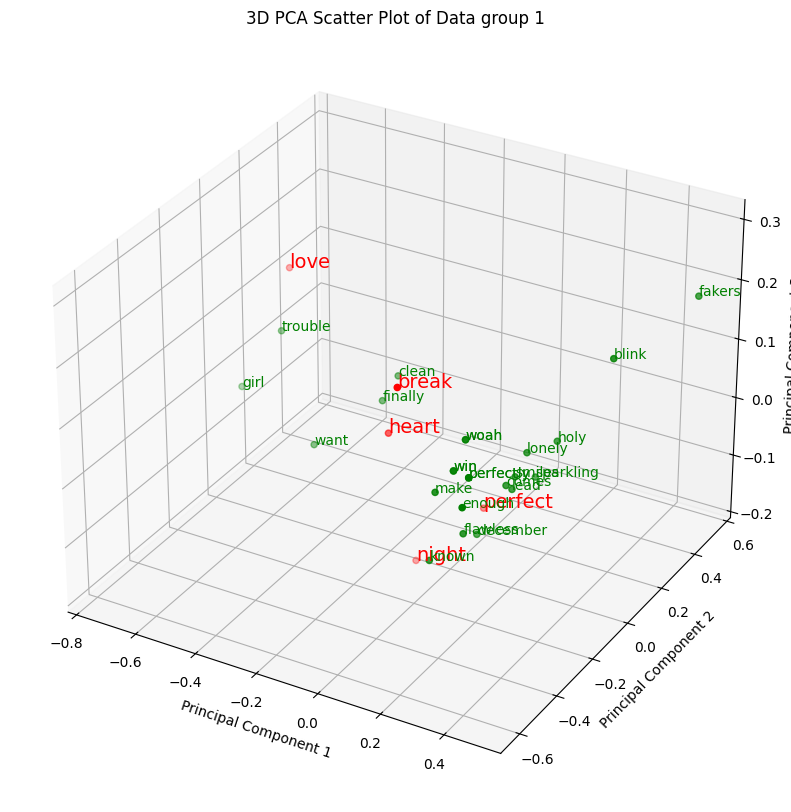

In [147]:
# Provided similarity results
group1_similar_love = [word for word, _ in simi_love]
group1_similar_break = [word for word, _ in simi_break]
group1_similar_perfect = [word for word, _ in simi_perfect]
group1_similar_night = [word for word, _ in simi_night]
group1_similar_heart = [word for word, _ in simi_heart]

main_words1 = ['love', 'break', 'perfect', 'night', 'heart']

similar_words1 = [word for sublist in [group1_similar_love, group1_similar_break, group1_similar_perfect, group1_similar_night, group1_similar_heart] for word in sublist]
all_words1 = main_words1 + [word for word in similar_words1 if word not in main_words1]

word_matrix1 = np.array([model1.wv[word] for word in all_words1])

pca1 = PCA(n_components=3)
pca_result1 = pca1.fit_transform(word_matrix1)

main_indices1 = [all_words1.index(word) for word in main_words1]
similar_indices1 = [i for i in range(len(all_words1)) if i not in main_indices1]

# Create the 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result1[main_indices1, 0], pca_result1[main_indices1, 1], pca_result1[main_indices1, 2],
           marker='o', color='red')
for i, word in enumerate(main_words1):
    ax.text(pca_result1[main_indices1[i], 0], pca_result1[main_indices1[i], 1], pca_result1[main_indices1[i], 2],
            word, color='red', fontsize=14)

ax.scatter(pca_result1[similar_indices1, 0], pca_result1[similar_indices1, 1], pca_result1[similar_indices1, 2],
           marker='o', color='green')
for i, word in enumerate([all_words1[i] for i in similar_indices1]):
    ax.text(pca_result1[similar_indices1[i], 0], pca_result1[similar_indices1[i], 1], pca_result1[similar_indices1[i], 2],
            word, color='green')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot of Data group 1")

plt.show()


### 3.2 Group 2

In [148]:
#Group 2
#Top 5 most similarity of 'love', 'break', 'perfect', 'night' and 'heart'

simi_love2 = model2.wv.most_similar('love')[:5]
simi_break2 = model2.wv.most_similar('break')[:5]
simi_perfect2 = model2.wv.most_similar('perfect')[:5]
simi_night2 = model2.wv.most_similar('night')[:5]
simi_heart2 = model2.wv.most_similar('heart')[:5]

print("Top 5 most similarity of 'love'")
print(simi_love2)
print("Top 5 most similarity of 'break'")
print(simi_break2)
print("Top 5 most similarity of 'perfect'")
print(simi_perfect2)
print("Top 5 most similarity of 'night'")
print(simi_night2)
print("Top 5 most similarity of 'heart'")
print(simi_heart2)

Top 5 most similarity of 'love'
[("ain't", 0.9915737509727478), ("nobody's", 0.9891356825828552), ('without', 0.9870738983154297), ('team', 0.9868431687355042), ('ya', 0.9866834878921509)]
Top 5 most similarity of 'break'
[('beautiful', 0.9964317679405212), ('terrified', 0.9963342547416687), ('quiet', 0.9960940480232239), ('kill', 0.996073842048645), ('youre', 0.9960057139396667)]
Top 5 most similarity of 'perfect'
[('someone', 0.9976600408554077), ('smile', 0.9972176551818848), ('eyes', 0.9971656203269958), ('moment', 0.9970565438270569), ('next', 0.9970552325248718)]
Top 5 most similarity of 'night'
[('dreams', 0.9916439056396484), ('middle', 0.9900450706481934), ('golden', 0.9872580766677856), ('gotta', 0.9850756525993347), ('wide', 0.9850755929946899)]
Top 5 most similarity of 'heart'
[('world', 0.9976293444633484), ('blue', 0.9975653886795044), ('okay', 0.9973241090774536), ('playing', 0.9972710609436035), ('heartbeat', 0.9971408843994141)]


### Show result of group 2 in DataFrame

In [149]:
# Convert to DataFrame
df2 = pd.DataFrame({
    'love_word': [word for word, _ in simi_love2],
    'love_score': [score for _, score in simi_love2],
    'break_word': [word for word, _ in simi_break2],
    'break_score': [score for _, score in simi_break2],
    'perfect_word': [word for word, _ in simi_perfect2],
    'perfect_score': [score for _, score in simi_perfect2],
    'night_word': [word for word, _ in simi_night2],
    'night_score': [score for _, score in simi_night2],
    'heart_word': [word for word, _ in simi_heart2],
    'heart_score': [score for _, score in simi_heart2]
})

# Display DataFrame
df2.index = range(1, 6)
df2

,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
1,ain't,0.991574,beautiful,0.996432,someone,0.997660,dreams,0.991644,world,0.997629
2,nobody's,0.989136,terrified,0.996334,smile,0.997218,middle,0.990045,blue,0.997565
3,without,0.987074,quiet,0.996094,eyes,0.997166,golden,0.987258,okay,0.997324
4,team,0.986843,kill,0.996074,moment,0.997057,gotta,0.985076,playing,0.997271
5,ya,0.986683,youre,0.996006,next,0.997055,wide,0.985076,heartbeat,0.997141


### Plot Data group 2

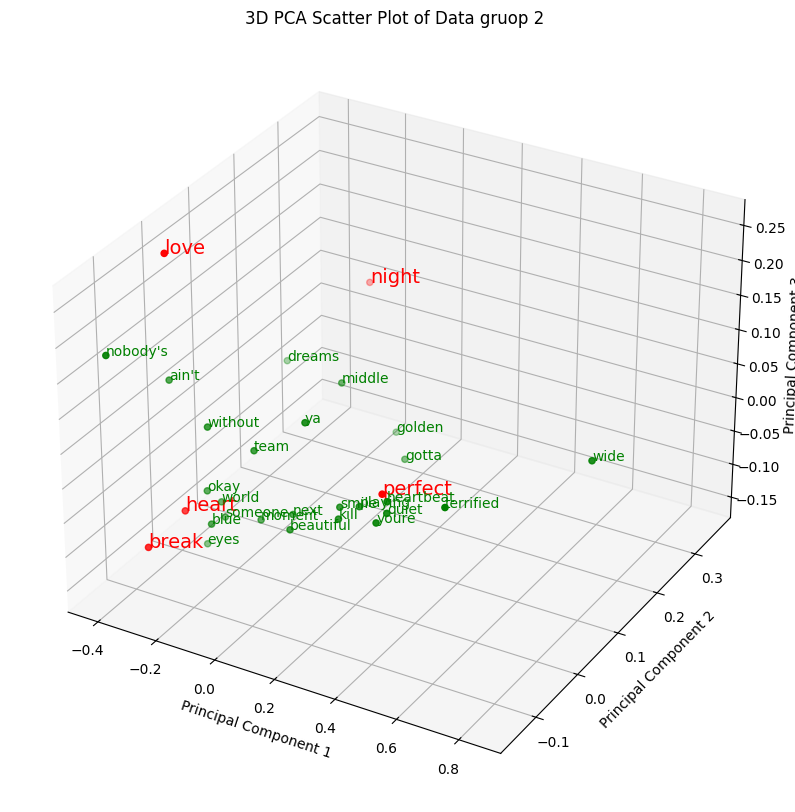

In [150]:
# Provided similarity results
group2_similar_love = [word for word, _ in simi_love2]
group2_similar_break = [word for word, _ in simi_break2]
group2_similar_perfect = [word for word, _ in simi_perfect2]
group2_similar_night = [word for word, _ in simi_night2]
group2_similar_heart = [word for word, _ in simi_heart2]

main_words2 = ['love', 'break', 'perfect', 'night', 'heart']

similar_words2 = [word for sublist in [group2_similar_love, group2_similar_break, group2_similar_perfect, group2_similar_night, group2_similar_heart] for word in sublist]

all_words2 = main_words2 + [word for word in similar_words2 if word not in main_words2]

word_matrix2 = np.array([model2.wv[word] for word in all_words2])

pca2 = PCA(n_components=3)
pca_result2 = pca2.fit_transform(word_matrix2)

main_indices2 = [all_words2.index(word) for word in main_words2]
similar_indices2 = [i for i in range(len(all_words2)) if i not in main_indices2]

# Create the 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result2[main_indices2, 0], pca_result2[main_indices2, 1], pca_result2[main_indices2, 2],
           marker='o', color='red')
for i, word in enumerate(main_words2):
    ax.text(pca_result2[main_indices2[i], 0], pca_result2[main_indices2[i], 1], pca_result2[main_indices2[i], 2],
            word, color='red', fontsize=14)

ax.scatter(pca_result2[similar_indices2, 0], pca_result2[similar_indices2, 1], pca_result2[similar_indices2, 2],
           marker='o', color='green')
for i, word in enumerate([all_words2[i] for i in similar_indices2]):
    ax.text(pca_result2[similar_indices2[i], 0], pca_result2[similar_indices2[i], 1], pca_result2[similar_indices2[i], 2],
            word, color='green')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Scatter Plot of Data gruop 2")

plt.show()